# Visualization of an ANPCP instance with solution

## ANPCP vs PCP

Let's read a small instance and generate a random solution to plot both.

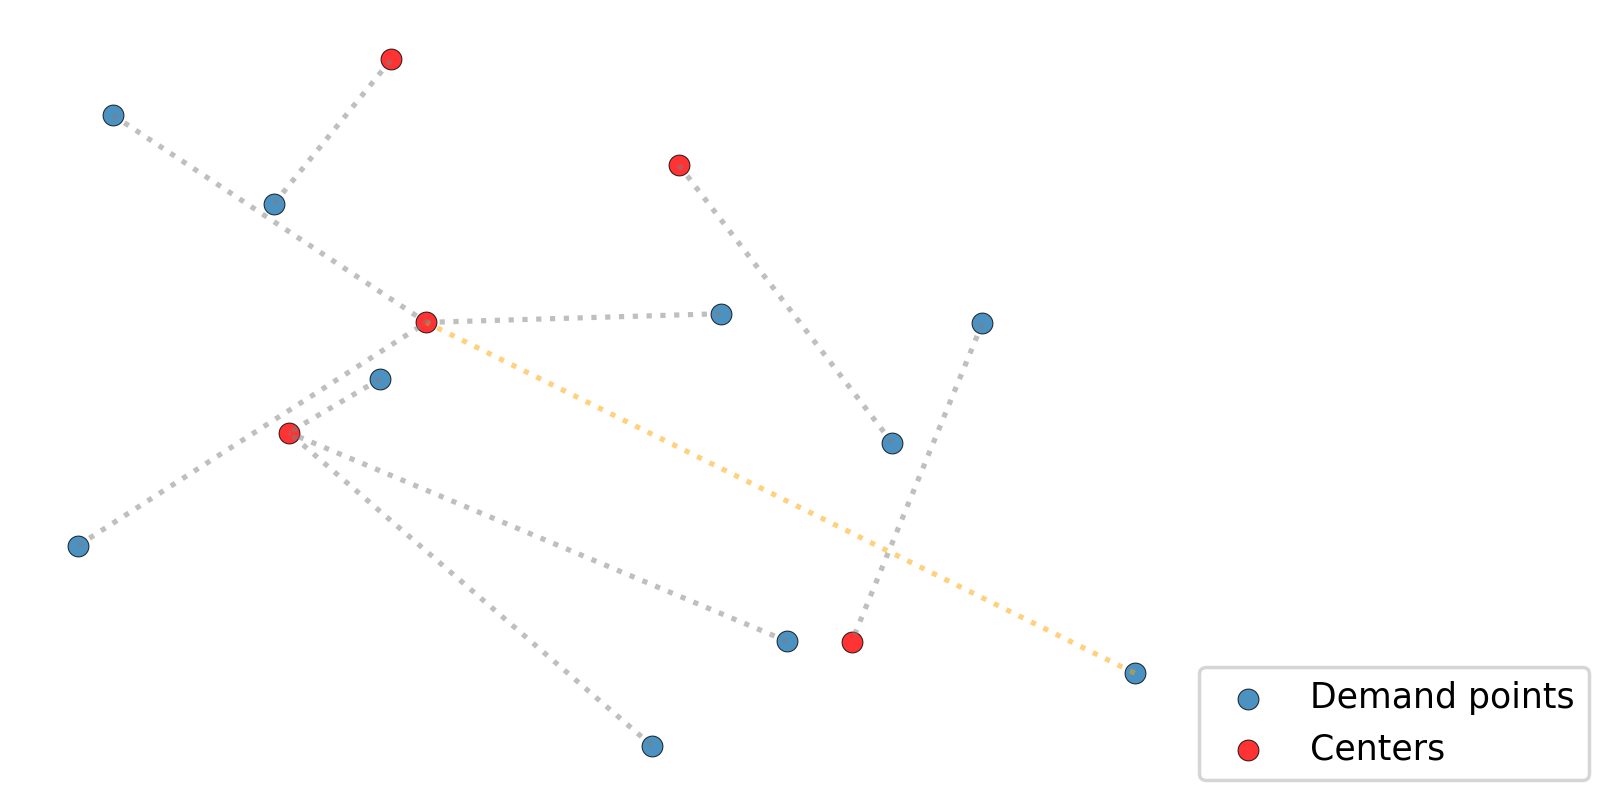

In [29]:
from models import Instance, Solver

instance = Instance.random(15)
solver = Solver(instance, 5, 2, True)
solver.plot(axis=False);

Each dotted line represents the assignment between a client and its $\alpha$-th closest facility.
The orange line is the larger distance, which defines the objective function.

In [30]:
temp_solution = solver.solution
temp_solution._solver = None
temp_solution

Solver.Solution(indexes={14, 8, 4, 10, 12}, objective_function=793, max_alphath=4)

In [31]:
solver = Solver(instance, 5, 1, False)
solver.solution.indexes = temp_solution.indexes
solver.solution.update_obj_func()
solver.solution

Solver.Solution(indexes={14, 8, 4, 10, 12}, objective_function=346, max_alphath=12)

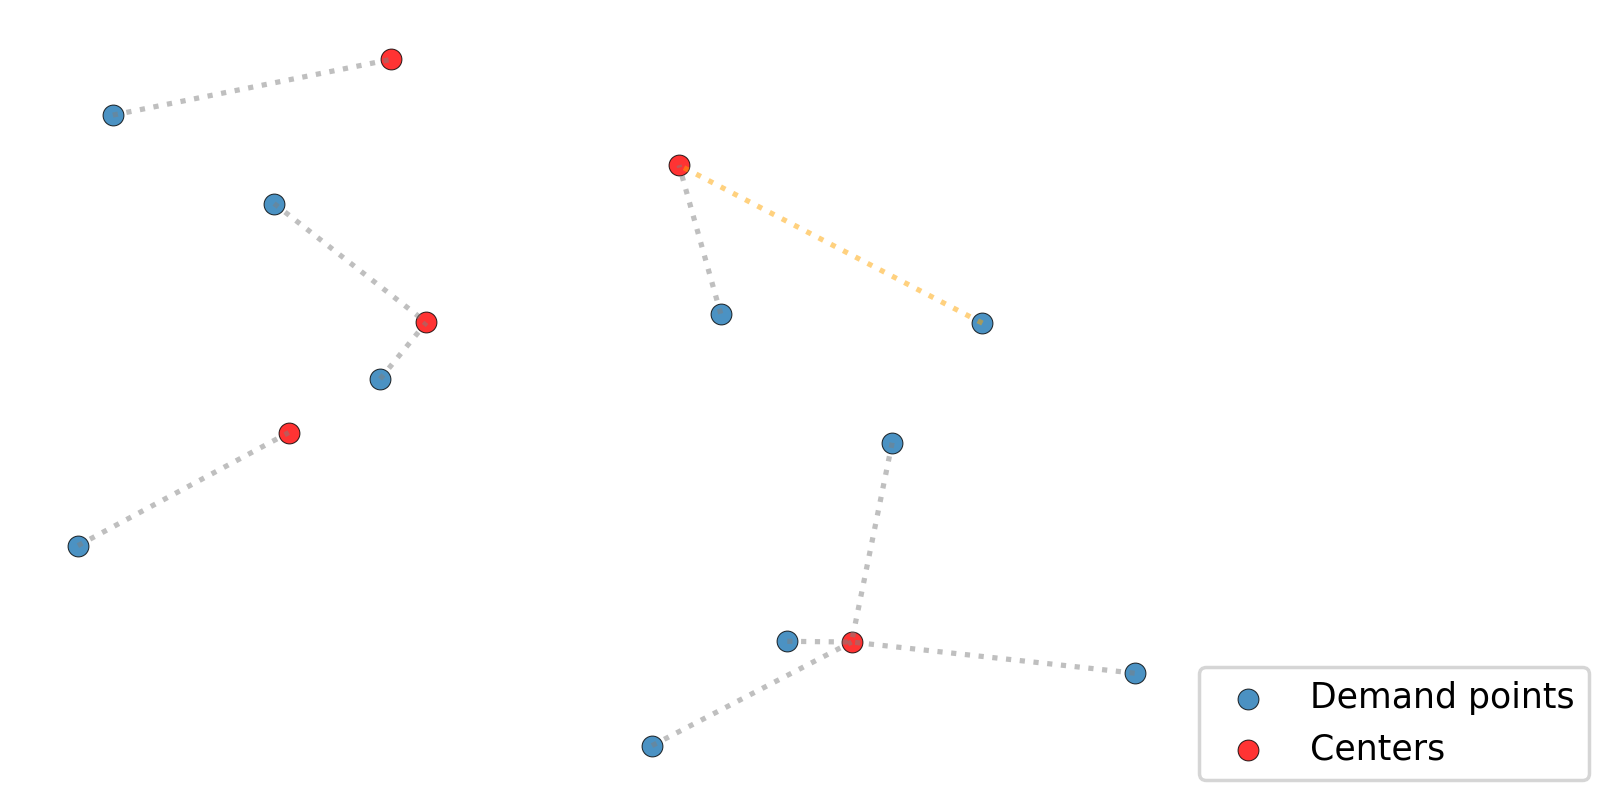

In [32]:
solver.plot(False);

Notice how when $\alpha = 1$, which is the $p$-center problem (PCP), the assignment lines don't cross each other, rather they form clusters.
Moreover, in this case there are some centers without clients, because they're not the closest one to any.

## Visualizing heuristic solutions

Let's compare how the local search improvement visually changes the solution yielded by the PDP construction heuristic.

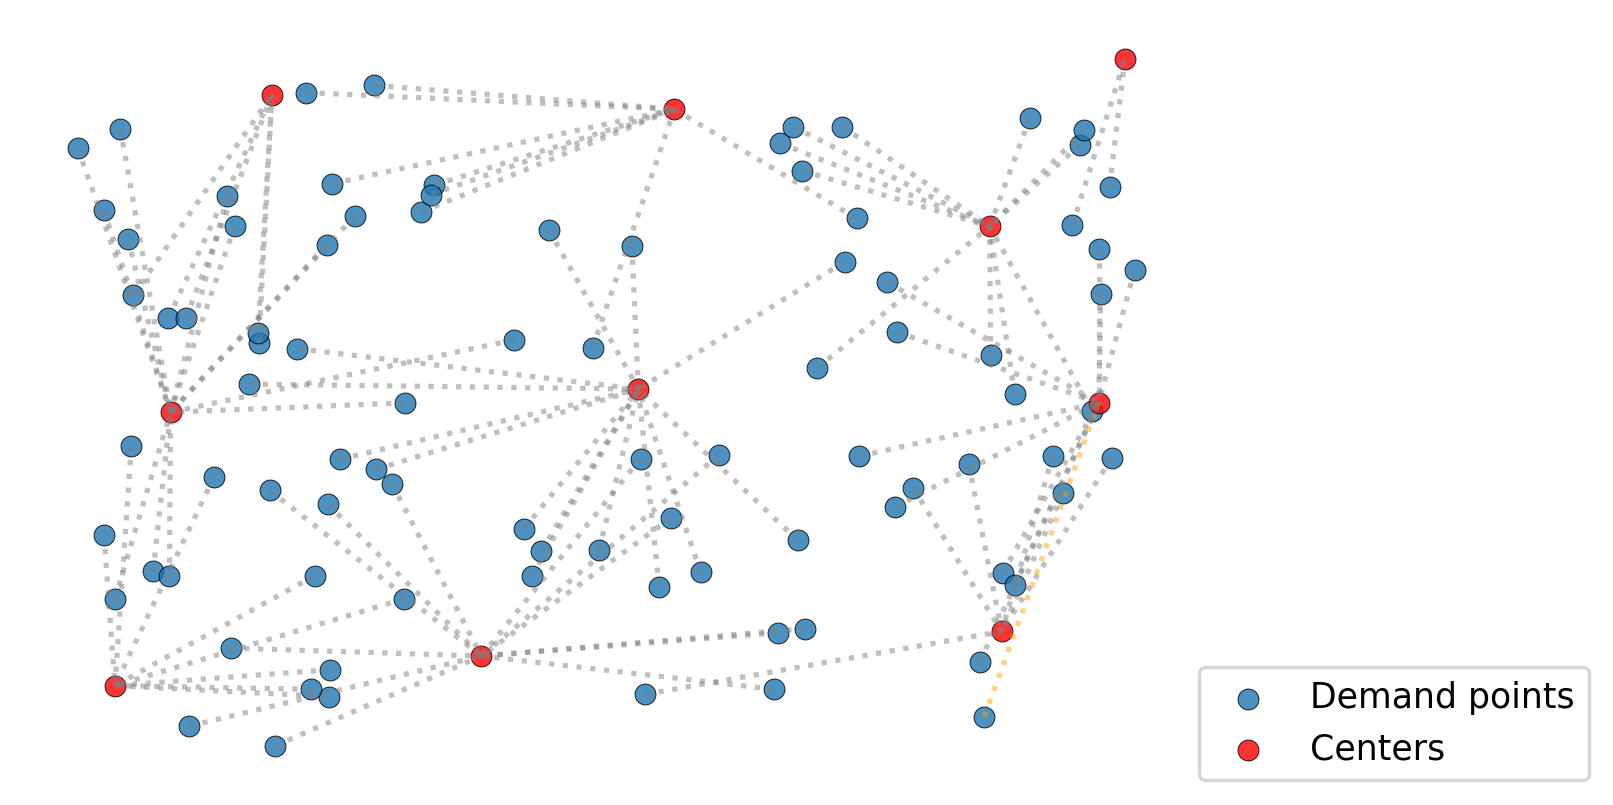

In [33]:
i100 = Instance.read('..\\data\\anpcp100_0.tsp')
s100 = Solver(i100, 10, 2, False)
s100.pdp()
s100.plot(axis=False);

The PDP heuristic primarily places the solution nodes on the corners of the plane, then on its edges, and then on its center.

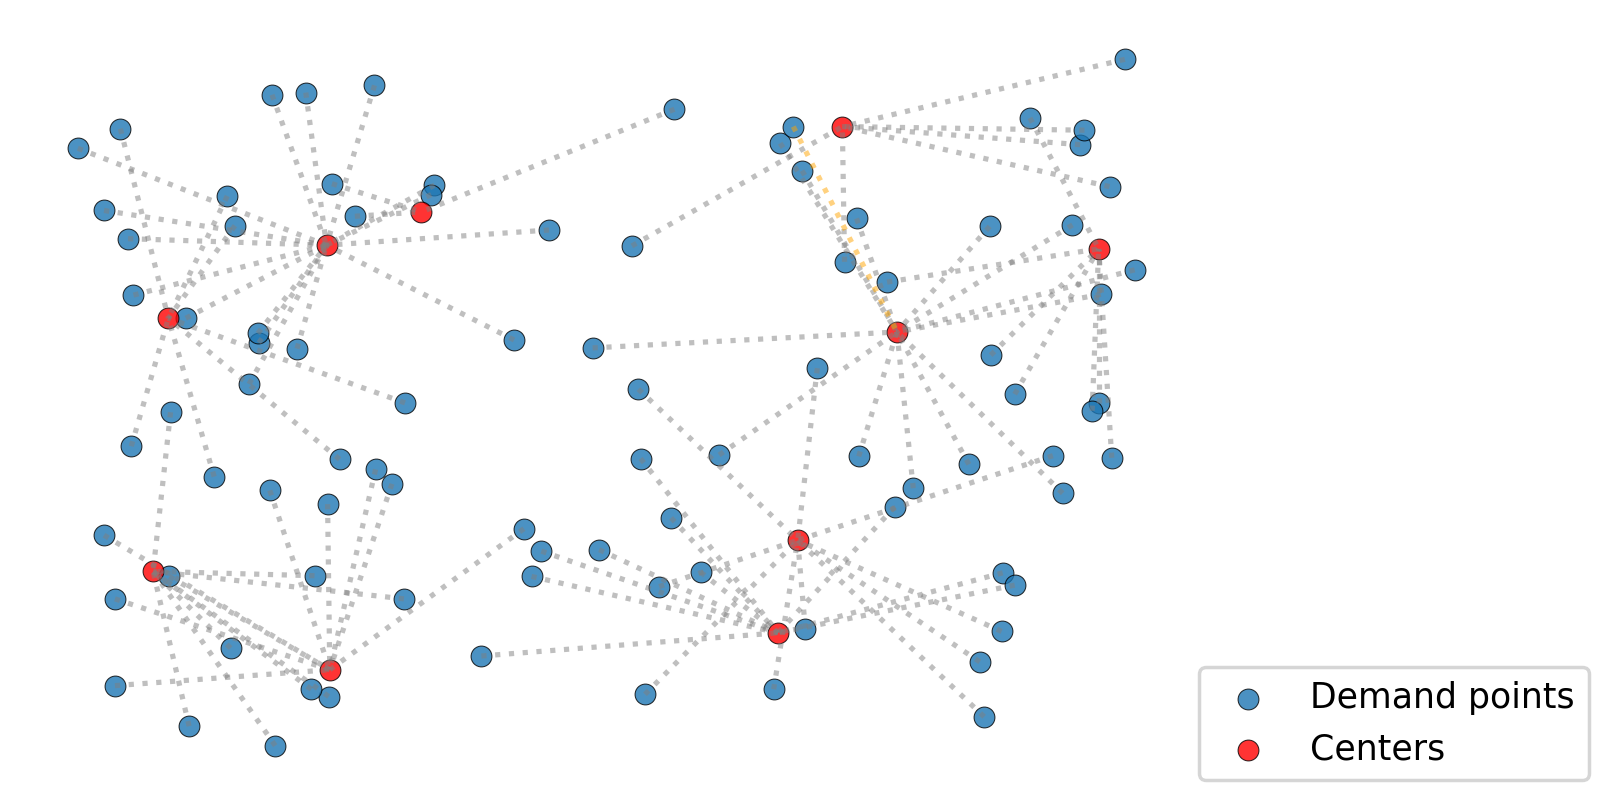

In [34]:
s100.interchange(is_first=False)
s100.plot(axis=False);

The ANPCP local search moves away the solution nodes from the edges of the plane.